Grupo: Péricles Buarque, Jorge Alexandre e João Luís

In [ ]:
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as sklp
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import numpy as np
import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

In [737]:
df = pd.read_csv('train.csv')

In [738]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [739]:
df = df.drop('black', axis=1)
df = df.drop('ID', axis=1)

In [740]:
colum = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']

In [741]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  lstat    333 non-null    float64
 12  medv     333 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 33.9 KB


In [743]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [744]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


In [745]:
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis     rad  tax  ptratio  lstat  medv
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900  1    296  15.3     4.98   24.0    1
1.62864   0.0   21.89  0     0.624  5.019  100.0  1.4394  4    437  21.2     34.41  14.4    1
1.51902   0.0   19.58  1     0.605  8.375  93.9   2.1620  5    403  14.7     3.32   50.0    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709  5    403  14.7     1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659  5    403  14.7     7.39   23.3    1
                                                                                           ..
0.11460   20.0  6.96   0     0.464  6.538  58.7   3.9175  3    223  18.6     7.73   24.4    1
0.11432   0.0   8.56   0     0.520  6.781  71.3   2.8561  5    384  20.9     7.67   26.5    1
0.11329   30.0  4.93   0     0.428  6.897  54.3   6.3361  6    300  16.6     11.38  22.0    1
0.11132   0.0   27.74  0     0.609  5.983  83.5   2.1099  4    71

In [746]:
#my_report = sv.analyze(df)
#my_report.show_html()

In [747]:
corr_matrix = df.corr()
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.689598
zn         0.344842
dis        0.249422
chas       0.204390
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

<Axes: xlabel='rm', ylabel='medv'>

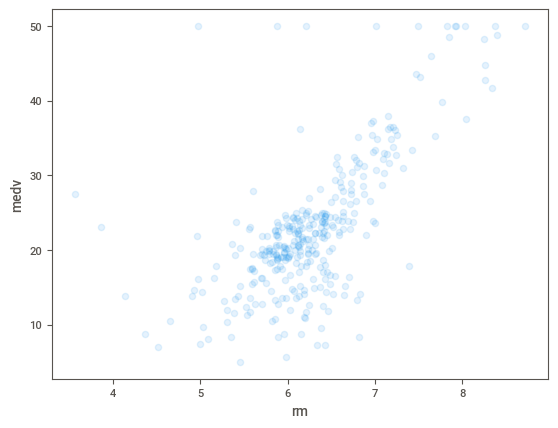

In [748]:
df.plot(kind='scatter', x='rm', y='medv', alpha=0.1)

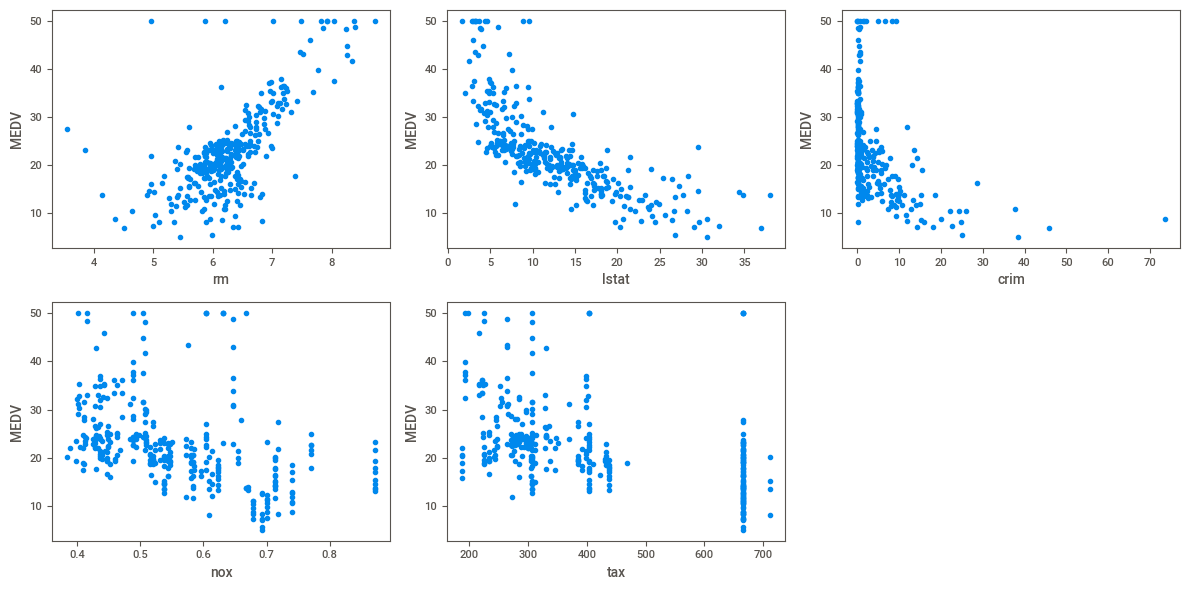

In [749]:
# Escolhendo variáveis de entrada e saída
X = df[['rm', 'lstat', 'crim', 'nox', 'tax']]
y = df['medv']

# Plotando a dispersão
plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[col], y, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

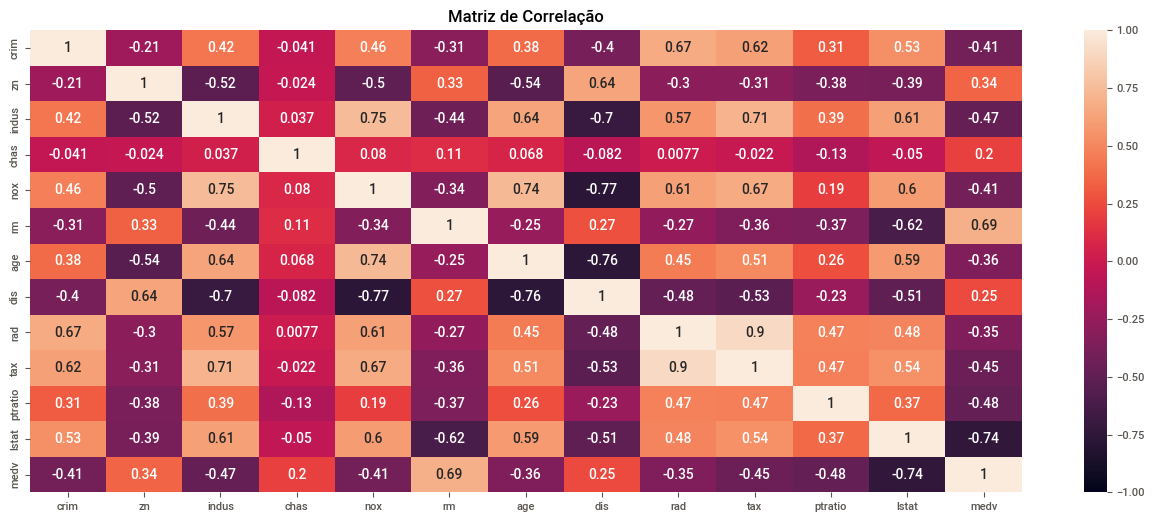

In [750]:
plt.figure(figsize=(16, 6))
heatmap = sns. heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Matriz de Correlação')
plt.show()


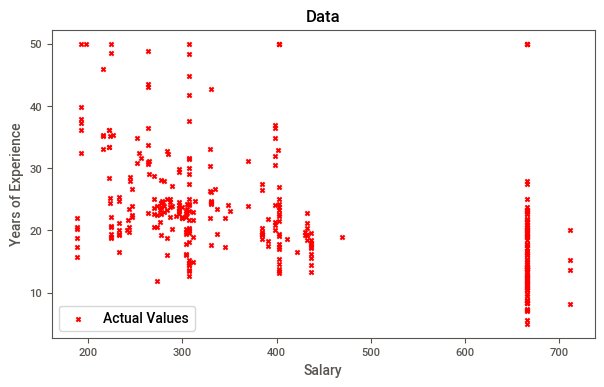

In [751]:
x = np.array(df['tax'])
y = np.array(df['medv'])

plt.figure(figsize=(7, 4))

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Data")
# Set the y-axis label
plt.ylabel('Years of Experience')
# Set the x-axis label
plt.xlabel('Salary')
plt.legend()
plt.show()

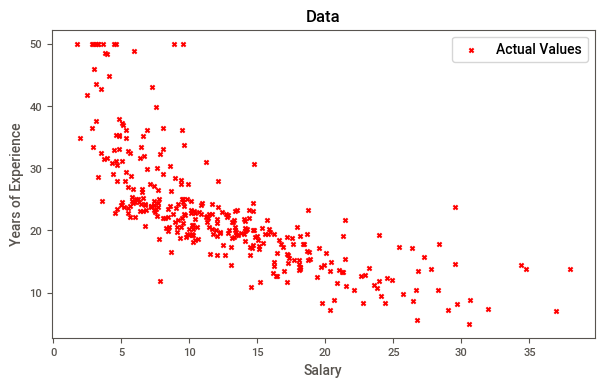

In [752]:
x = np.array(df['lstat'])
y = np.array(df['medv'])

plt.figure(figsize=(7, 4))

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Data")
# Set the y-axis label
plt.ylabel('Years of Experience')
# Set the x-axis label
plt.xlabel('Salary')
plt.legend()
plt.show()

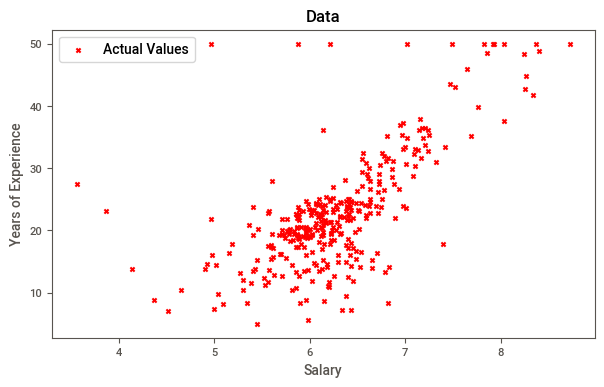

In [753]:
x = np.array(df['rm'])
y = np.array(df['medv'])

plt.figure(figsize=(7, 4))

# Plot the data points
plt.scatter(x, y, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Data")
# Set the y-axis label
plt.ylabel('Years of Experience')
# Set the x-axis label
plt.xlabel('Salary')
plt.legend()
plt.show()

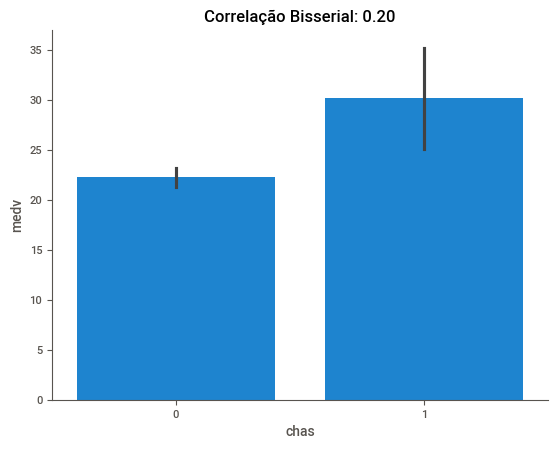

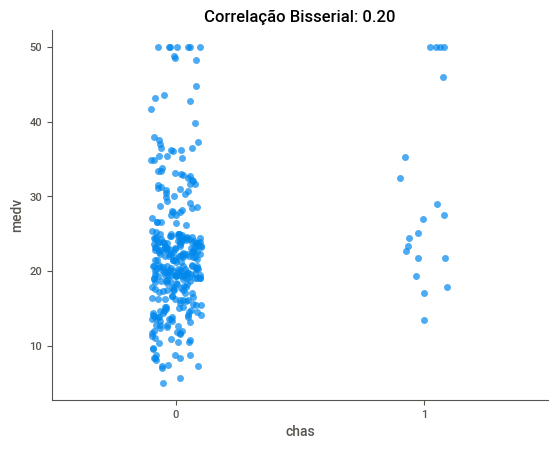

In [754]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['chas'], df['medv'])

# Plotando um gráfico de barra para visualizar a correlação bisserial
sns.barplot(x='chas', y='medv', data=df)
sns.despine()
plt.title(f'Correlação Bisserial: {correlation:.2f}')
plt.show()

# Plotando um gráfico de dispersão para visualizar a correlação bisserial
sns.stripplot(x='chas', y='medv', data=df, jitter=True, alpha=0.7)
sns.despine()
plt.title(f'Correlação Bisserial: {correlation:.2f}')
plt.show()


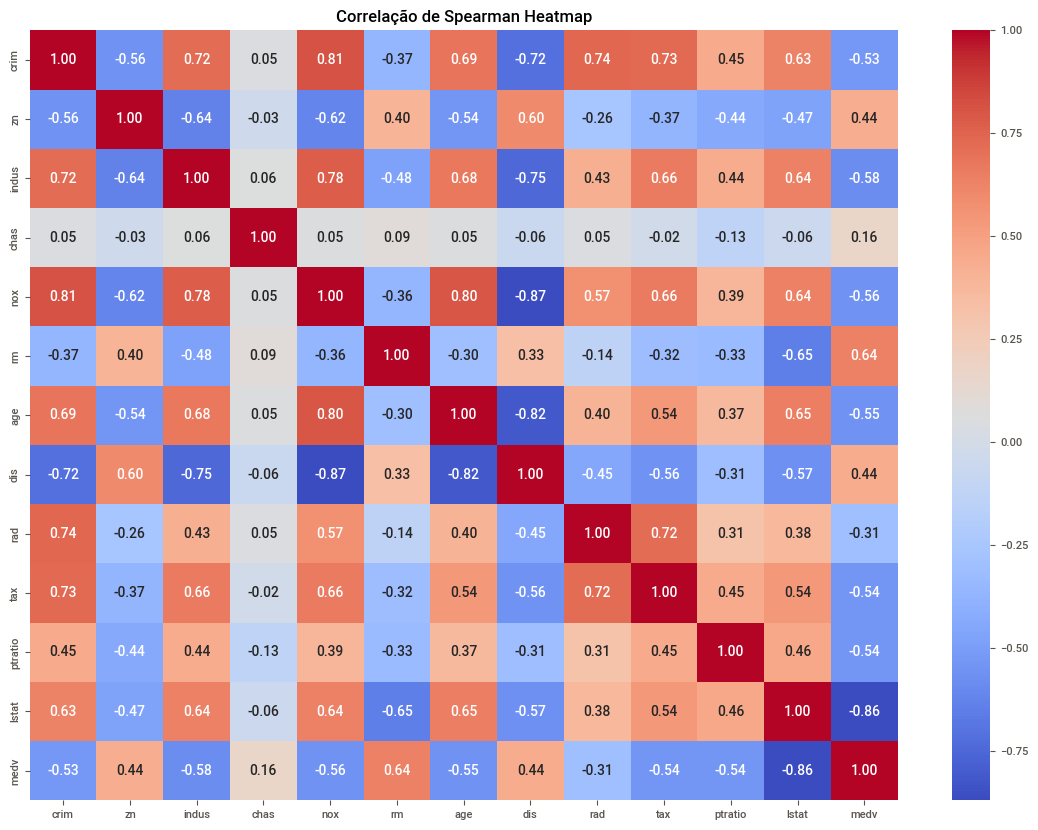

In [755]:
correlation_matrix = df.corr(method='spearman')

# Plotando o heatmap da correlação de Spearman
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Spearman Heatmap')
plt.show()

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: x

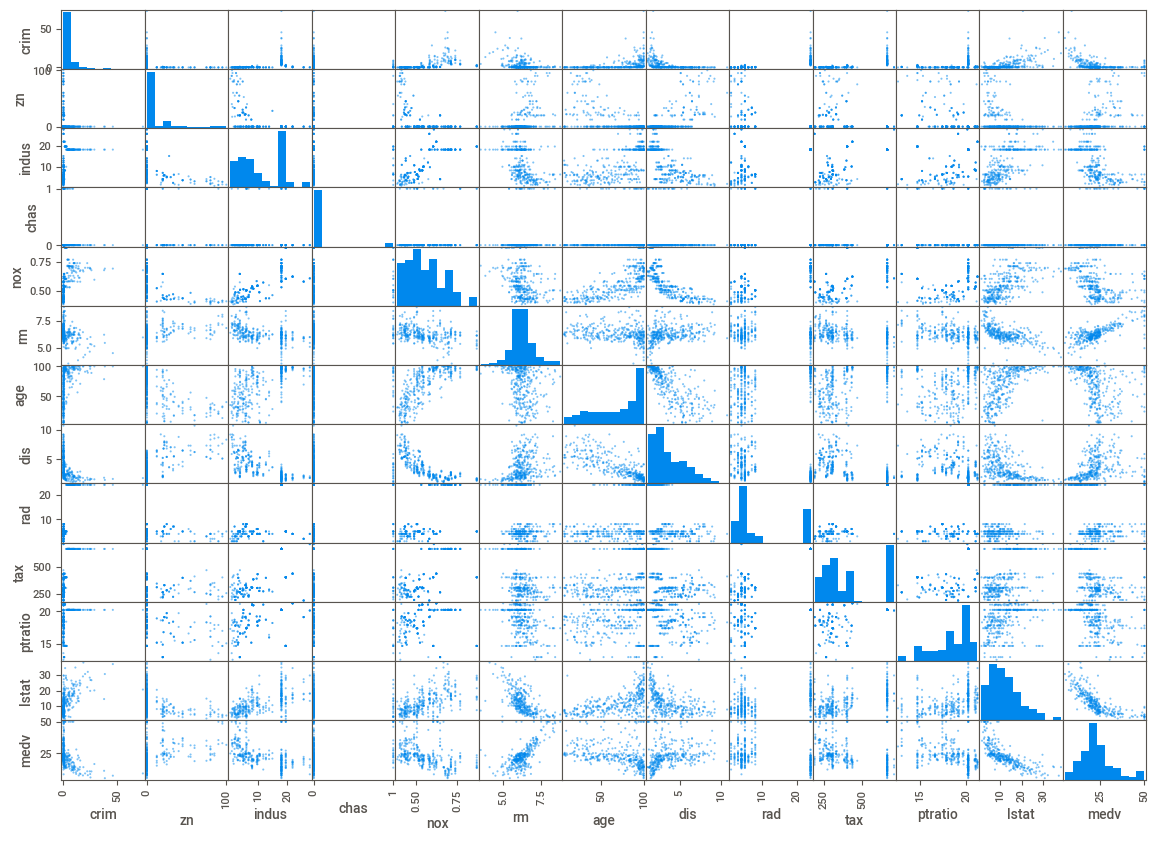

In [756]:
scatter_matrix(df[colum], figsize=(14,10))

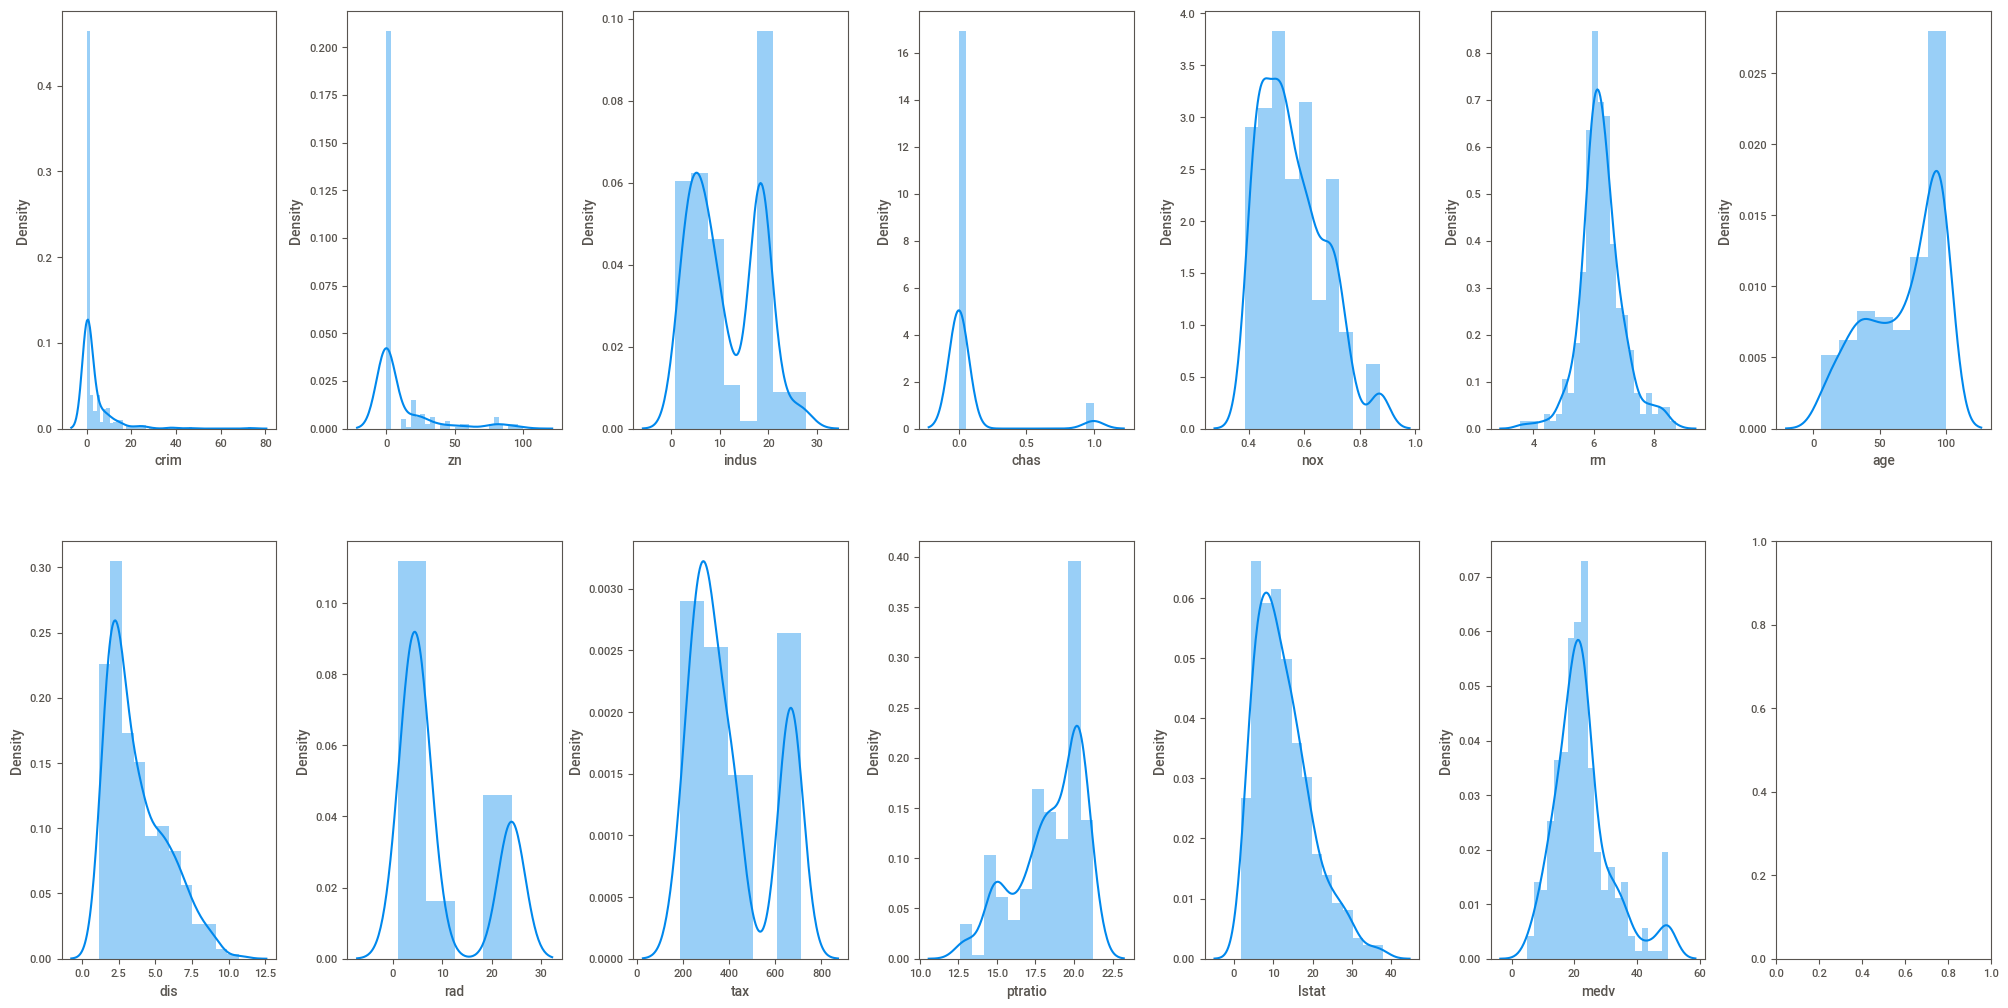

In [757]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [758]:
features = df[colum]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(data=scaled_features, columns=colum)

print("DataFrame Normalizado (MinMaxScaler):")
print(df_scaled)


DataFrame Normalizado (MinMaxScaler):
         crim     zn     indus  chas       nox        rm       age       dis  \
0    0.000000  0.180  0.058148   0.0  0.314815  0.583656  0.629787  0.308996   
1    0.000285  0.000  0.234444   0.0  0.172840  0.553834  0.775532  0.400545   
2    0.000354  0.000  0.053333   0.0  0.150206  0.665569  0.423404  0.514848   
3    0.000853  0.000  0.053333   0.0  0.150206  0.694423  0.512766  0.514848   
4    0.001115  0.125  0.264074   0.0  0.286008  0.474632  0.644681  0.462482   
..        ...    ...       ...   ...       ...       ...       ...       ...   
328  0.002333  0.000  0.331481   0.0  0.411523  0.388846  0.718085  0.132589   
329  0.000766  0.000  0.414444   0.0  0.386831  0.587142  0.671277  0.140804   
330  0.000530  0.000  0.414444   0.0  0.386831  0.495546  0.752128  0.120858   
331  0.000740  0.000  0.414444   0.0  0.386831  0.661309  0.904255  0.108332   
332  0.000559  0.000  0.414444   0.0  0.386831  0.478118  0.795745  0.143559   

 

# Holdout total

In [759]:
X = df_scaled.drop(columns=['medv']).values
y = df_scaled['medv'].values

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [760]:
X_treinamento

array([[6.61654683e-04, 0.00000000e+00, 1.64814815e-01, ...,
        6.88336520e-02, 8.83720930e-01, 2.21026490e-01],
       [1.96741966e-03, 0.00000000e+00, 3.43333333e-01, ...,
        4.66539197e-01, 6.04651163e-01, 2.36479029e-01],
       [6.45477124e-02, 0.00000000e+00, 6.42962963e-01, ...,
        9.13957935e-01, 8.83720930e-01, 4.52538631e-01],
       ...,
       [1.81770754e-02, 0.00000000e+00, 6.97777778e-01, ...,
        4.11089866e-01, 2.44186047e-01, 1.29690949e-01],
       [3.52714035e-01, 0.00000000e+00, 6.42962963e-01, ...,
        9.13957935e-01, 8.83720930e-01, 6.87362031e-01],
       [2.24443061e-02, 0.00000000e+00, 6.97777778e-01, ...,
        4.11089866e-01, 2.44186047e-01, 3.41335541e-01]])

# Regressão Linear Simples 1 variável

## Holdout 1 variável

In [761]:
X1 = df_scaled['rm'].values
y1 = df_scaled['medv'].values
X_treinamento1, X_teste1, y_treinamento1, y_teste1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [762]:

X_treinamento1=X_treinamento1.reshape(-1, 1)
y_treinamento1=y_treinamento1.reshape(-1, 1)
X_teste1=X_teste1.reshape(-1, 1)
y_teste1=y_teste1.reshape(-1, 1)


In [763]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Criando o modelo de regressão linear simples
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_treinamento1, y_treinamento1)

# Fazendo previsões nos dados de treinamento e teste
y_train_pred = regressor.predict(X_treinamento1)
y_test_pred = regressor.predict(X_teste1)

# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_treinamento1, y_train_pred))
print('R² nos dados de treinamento:', r2_score(y_treinamento1, y_train_pred))

# Avaliando o modelo nos dados de teste
print('MSE nos dados de teste:', mean_squared_error(y_teste1, y_test_pred))
print('R² nos dados de teste:', r2_score(y_teste1, y_test_pred))


MSE nos dados de treinamento: 0.022730806182491143
R² nos dados de treinamento: 0.4408036085144993
MSE nos dados de teste: 0.01795635679797026
R² nos dados de teste: 0.595974711770942


# Regressão Linear Simples

## Holdout Parcial

In [764]:
X = df_scaled.drop(columns=['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'medv']).values
y = df_scaled['medv'].values

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [765]:
from sklearn.metrics import mean_squared_error, r2_score
# Criando o modelo de regressão linear simples
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_treinamento, y_treinamento)

# Fazendo previsões nos dados de treinamento e teste
y_train_pred = regressor.predict(X_treinamento)
y_test_pred = regressor.predict(X_teste)

# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_treinamento, y_train_pred))
print('R² nos dados de treinamento:', r2_score(y_treinamento, y_train_pred))

# Avaliando o modelo nos dados de teste
print('MSE nos dados de teste:', mean_squared_error(y_teste, y_test_pred))
print('R² nos dados de teste:', r2_score(y_teste, y_test_pred))

MSE nos dados de treinamento: 0.014597109683476679
R² nos dados de treinamento: 0.6408991834435831
MSE nos dados de teste: 0.011751326425392119
R² nos dados de teste: 0.7355904040273091


## Kfold

In [766]:
num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
modelo_linear = LinearRegression()
resultados = cross_val_score(modelo_linear, X_treinamento, y_treinamento, cv=kf)

print("Resultados da validação cruzada:", resultados)
print("Precisão média:", resultados.mean())


# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_treinamento, y_train_pred))
print('R² nos dados de treinamento:', r2_score(y_treinamento, y_train_pred))

Resultados da validação cruzada: [0.72168741 0.8051959  0.57535694 0.47339854 0.31097007 0.65310538
 0.45123014 0.66965314 0.62142968 0.73852642]
Precisão média: 0.60205536393329
MSE nos dados de treinamento: 0.014597109683476679
R² nos dados de treinamento: 0.6408991834435831


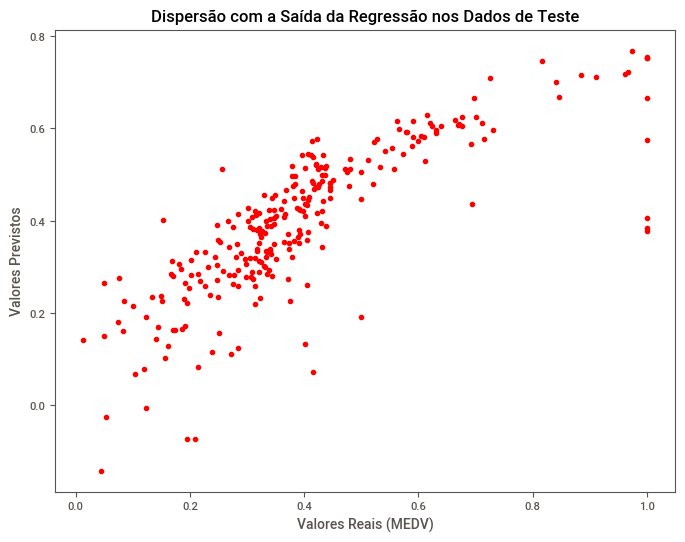

In [767]:
plt.figure(figsize=(8, 6))
plt.scatter(y_treinamento, y_train_pred, color='red')
plt.xlabel('Valores Reais (MEDV)')
plt.ylabel('Valores Previstos')
plt.title('Dispersão com a Saída da Regressão nos Dados de Trenamento')
plt.show()

In [768]:
num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
modelo_linear = LinearRegression()
resultados = cross_val_score(modelo_linear, X_teste, y_teste, cv=kf)

print("Resultados da validação cruzada:", resultados)
print("Precisão média:", resultados.mean())


# Avaliando o modelo nos dados de treinamento
print('MSE nos dados de treinamento:', mean_squared_error(y_teste, y_test_pred))
print('R² nos dados de treinamento:', r2_score(y_teste, y_test_pred))

Resultados da validação cruzada: [ 0.05048394  0.84485708  0.57702784  0.79564521  0.23753846  0.77112195
  0.34650015  0.85237015 -1.44289274  0.62079283]
Precisão média: 0.36534448542914094
MSE nos dados de treinamento: 0.011751326425392119
R² nos dados de treinamento: 0.7355904040273091


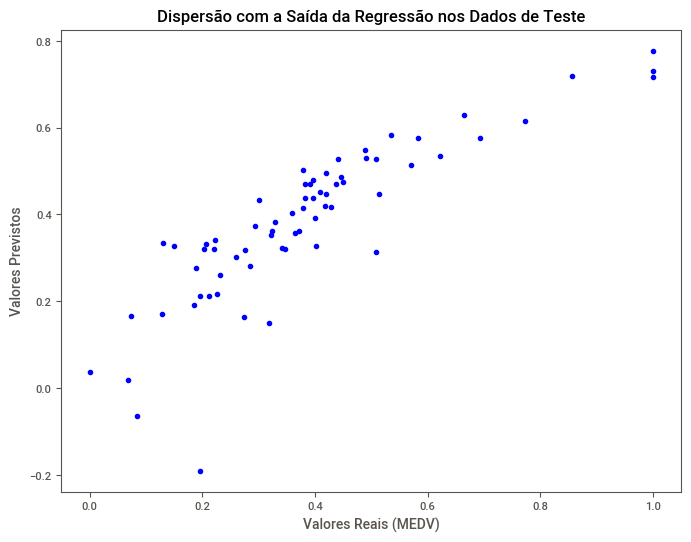

In [769]:
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_test_pred, color='blue')
plt.xlabel('Valores Reais (MEDV)')
plt.ylabel('Valores Previstos')
plt.title('Dispersão com a Saída da Regressão nos Dados de Teste')
plt.show()

## Lasso com Kfold

In [770]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Configurando a validação cruzada k-fold com k=5
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Inicializando uma lista para armazenar os resultados do MSE em cada fold
mse_scores = []
r2_scores = []
# Iterando sobre os folds
for train_index, test_index in kf.split(X_treinamento):
    X_train, X_val = X_treinamento[train_index], X_treinamento[test_index]
    y_train, y_val = y_treinamento[train_index], y_treinamento[test_index]
    
    # Criando e treinando o modelo de Regressão Lasso (L1)
    lasso_reg = Lasso(alpha=0.1)  # O parâmetro alpha controla a força da regularização
    lasso_reg.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de validação
    y_pred = lasso_reg.predict(X_val)
    
    # Calculando o erro (MSE) no conjunto de validação e armazenando
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)


# Calculando a média dos MSEs de todos os folds
average_mse = np.mean(mse_scores)
print("Média do Erro (MSE) na Regressão Lasso com k-fold Cross-Validation:", average_mse)

# Calculando a média dos R2 de todos os folds
average_r2 = np.mean(r2_scores)
print("Média do R2 na Regressão Lasso com k-fold Cross-Validation:", average_r2)


Média do Erro (MSE) na Regressão Lasso com k-fold Cross-Validation: 0.04086351524097723
Média do R2 na Regressão Lasso com k-fold Cross-Validation: -0.023088501352145886


In [771]:
from sklearn.linear_model import Ridge

# Configurando a validação cruzada k-fold com k=5
kf = KFold(n_splits=50, shuffle=True, random_state=0)

# Inicializando uma lista para armazenar os resultados do MSE em cada fold
mse_scores = []
r2_scores = []
# Iterando sobre os folds
for train_index, test_index in kf.split(X_treinamento):
    X_train, X_val = X_treinamento[train_index], X_treinamento[test_index]
    y_train, y_val = y_treinamento[train_index], y_treinamento[test_index]
    
    # Criando e treinando o modelo de Regressão Ridge (L2)
    ridge_reg = Ridge(alpha=1.0)  # O parâmetro alpha controla a força da regularização
    ridge_reg.fit(X_train, y_train)
    
    # Fazendo previsões no conjunto de validação
    y_pred = ridge_reg.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)

    mse_scores.append(mse)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)  # Adiciona o R^2 à lista de resultados

# Calculando a média dos MSEs de todos os folds
average_mse = np.mean(mse_scores)

print("Média do Erro (MSE) na Regressão Ridge com k-fold Cross-Validation:", average_mse)
average_r2 = np.mean(r2_scores)
print("Média do R^2 na Regressão Ridge com k-fold Cross-Validation:", average_r2)



Média do Erro (MSE) na Regressão Ridge com k-fold Cross-Validation: 0.015379273173485879
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.25131355909669795


# Regressão polinomial

# Kfold

In [772]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Configurando a validação cruzada k-fold com k=5
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Inicializando uma lista para armazenar os resultados do MSE em cada fold
mse_scores = []
r2_scores = []

degrees = [1,2,3,4,5,10]

for d in degrees:
# Iterando sobre os folds
    for train_index, test_index in kf.split(X_treinamento):
        X_train, X_val = X_treinamento[train_index], X_treinamento[test_index]
        y_train, y_val = y_treinamento[train_index], y_treinamento[test_index]
        
        model = Pipeline([
            ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
            ("lin_reg", Ridge())
        ])
        model.fit(X_train, y_train)
        
        # Fazendo previsões no conjunto de validação
        y_pred = model.predict(X_val)
        
        # Calculando o erro (MSE) no conjunto de validação e armazenando
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)  # Adiciona o R^2 à lista de resultados

# Calculando a média dos MSEs de todos os folds
    average_mse = np.mean(mse_scores)
    print("Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation:", average_mse)
    average_r2 = np.mean(r2_scores)
    print("Média do R^2 na Regressão Ridge com k-fold Cross-Validation:", average_r2)


Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 0.015343480274484044
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.609976362486618
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 0.013687823814944839
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.6498222423821473
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 0.01270361937577639
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.672849323349428
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 0.012135660467003734
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.6858803809774777
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 0.011791440031083157
Média do R^2 na Regressão Ridge com k-fold Cross-Validation: 0.693640295473806
Média do Erro (MSE) na Regressão Polinomial com k-fold Cross-Validation: 0.011585734104694538
Média do R^2 na Regressão Ridge com k-fo

In [784]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.pipeline import Pipeline

# Graus polinomiais que você deseja testar
graus = [1, 2, 3, 4, 5]

# Iterando sobre os diferentes graus
for grau in graus:
    # Criando o modelo de Regressão Polinomial com o grau atual
    modelo = Pipeline([
        ("poly_features", PolynomialFeatures(degree=grau, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    
    # Fazendo previsões usando cross_val_predict com k-fold=10
    y_pred = cross_val_predict(modelo, X_treinamento, y_treinamento, cv=10)
    
    # Calculando o MSE
    mse = mean_squared_error(y_treinamento, y_pred)
    
    # Calculando o R^2 score manualmente
    r2 = r2_score(y_treinamento, y_pred)
    
    # Imprimindo o resultado
    print(f"Grau {grau}: MSE: {mse:.4f}, R² Score: {r2:.4f}")


Grau 1: MSE: 0.0155, R² Score: 0.6192
Grau 2: MSE: 0.0105, R² Score: 0.7405
Grau 3: MSE: 0.0142, R² Score: 0.6495
Grau 4: MSE: 0.0307, R² Score: 0.2450
Grau 5: MSE: 0.1970, R² Score: -3.8451


## Procurando o melhor valor de alpha

In [792]:
from sklearn.model_selection import GridSearchCV

graus = [1, 2, 3, 4, 5]

for grau in graus:
    # Crie o modelo polinomial
    poly_features = PolynomialFeatures(degree=grau, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_treinamento)
    X_test_poly = poly_features.transform(X_teste)
    
    # Defina os valores de alpha que você deseja testar
    parametros_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
    parametros_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
    
    # Encontre o melhor valor de alpha para o modelo Ridge usando GridSearchCV
    grid_search_ridge = GridSearchCV(Ridge(), parametros_ridge, cv=10, scoring='r2')
    grid_search_ridge.fit(X_train_poly, y_treinamento)
    
    # Encontre o melhor valor de alpha para o modelo Lasso usando GridSearchCV
    grid_search_lasso = GridSearchCV(Lasso(), parametros_lasso, cv=10, scoring='r2')
    grid_search_lasso.fit(X_train_poly, y_treinamento)
    
    # Obtenha os melhores modelos encontrados
    melhor_modelo_ridge = grid_search_ridge.best_estimator_
    melhor_modelo_lasso = grid_search_lasso.best_estimator_
    
    # Faça previsões usando os melhores modelos
    y_pred_ridge = melhor_modelo_ridge.predict(X_test_poly)
    y_pred_lasso = melhor_modelo_lasso.predict(X_test_poly)
    
    # Calcule R² scores e MSE para os melhores modelos
    r2_ridge = r2_score(y_teste, y_pred_ridge)
    mse_ridge = mean_squared_error(y_teste, y_pred_ridge)
    
    r2_lasso = r2_score(y_teste, y_pred_lasso)
    mse_lasso = mean_squared_error(y_teste, y_pred_lasso)
    
    # Imprima os resultados
    print(f"Modelo Polinomial (Grau {grau}):")
    print(f"Melhor Modelo Ridge: R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}, Melhor Alpha: {melhor_modelo_ridge.alpha}")
    print(f"Melhor Modelo Lasso: R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}, Melhor Alpha: {melhor_modelo_lasso.alpha}")
    print("")


Modelo Polinomial (Grau 1):
Melhor Modelo Ridge: R² Score: 0.7343, MSE: 0.0118, Melhor Alpha: 1
Melhor Modelo Lasso: R² Score: 0.5613, MSE: 0.0195, Melhor Alpha: 0.01

Modelo Polinomial (Grau 2):
Melhor Modelo Ridge: R² Score: 0.8769, MSE: 0.0055, Melhor Alpha: 0.1
Melhor Modelo Lasso: R² Score: 0.6411, MSE: 0.0159, Melhor Alpha: 0.01

Modelo Polinomial (Grau 3):
Melhor Modelo Ridge: R² Score: 0.8791, MSE: 0.0054, Melhor Alpha: 0.1
Melhor Modelo Lasso: R² Score: 0.6520, MSE: 0.0155, Melhor Alpha: 0.01

Modelo Polinomial (Grau 4):
Melhor Modelo Ridge: R² Score: 0.8709, MSE: 0.0057, Melhor Alpha: 1
Melhor Modelo Lasso: R² Score: 0.6520, MSE: 0.0155, Melhor Alpha: 0.01

Modelo Polinomial (Grau 5):
Melhor Modelo Ridge: R² Score: 0.8709, MSE: 0.0057, Melhor Alpha: 1
Melhor Modelo Lasso: R² Score: 0.6520, MSE: 0.0155, Melhor Alpha: 0.01



Melhor Grau encontrado foi o 3, utilizando o valor 0.1 de alpha com a regularização Ridge

# Modelo final

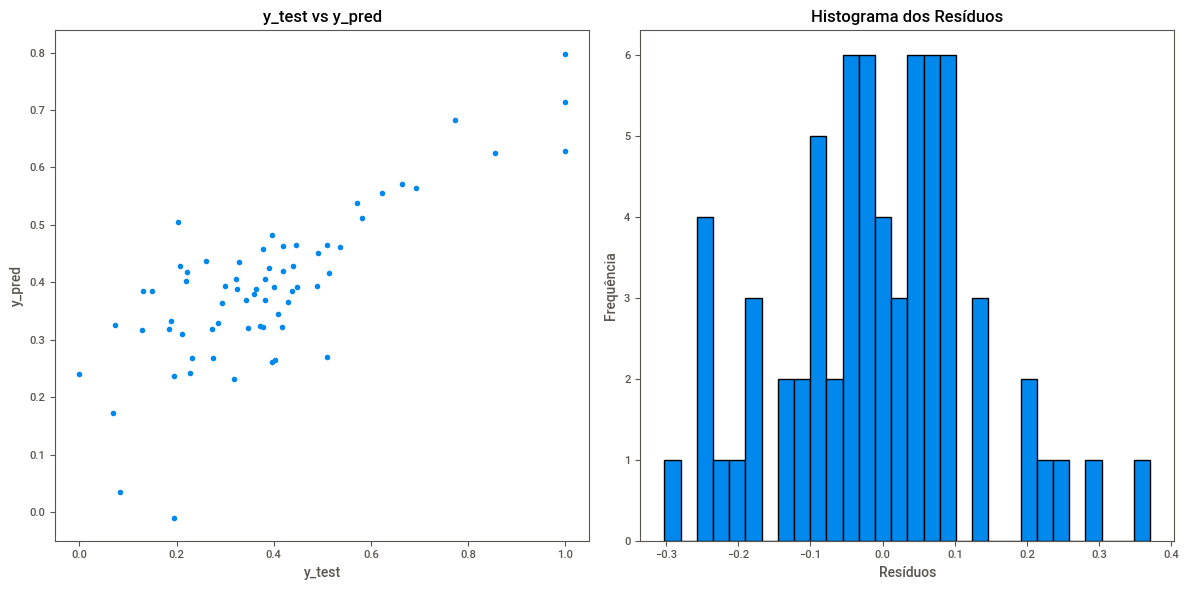

MSE: 0.0180
R²: 0.5960
R² Ajustado: 0.5898


In [797]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Criando e treinando o modelo de Regressão Linear Simples
modelo = LinearRegression()
modelo.fit(X_treinamento1, y_treinamento1)

# Fazendo previsões nos dados de teste
y_test_pred = modelo.predict(X_teste1)

# Calculando as métricas de erro
mse = mean_squared_error(y_teste1, y_test_pred)
r2 = r2_score(y_teste1, y_test_pred)

# Calculando R² Ajustado
n = X_teste1.shape[0] # número de observações de teste
p = X_teste1.shape[1] # número de features
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Visualizando os resíduos
plt.figure(figsize=(12, 6))

# Gráfico y_test vs y_pred
plt.subplot(1, 2, 1)
plt.scatter(y_teste1, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')

# Histograma dos resíduos
residuos = y_teste1 - y_test_pred
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')

plt.tight_layout()
plt.show()

# Imprimindo as métricas
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')
print(f'R² Ajustado: {r2_ajustado:.4f}')


# Decision Tree

In [781]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_treinamento, y_treinamento)

DecisionTreeRegressor()

In [782]:
predict = tree_reg.predict(X_teste)
tree_mse = mean_squared_error(y_teste, predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.13234570651441235